# Column Transformer
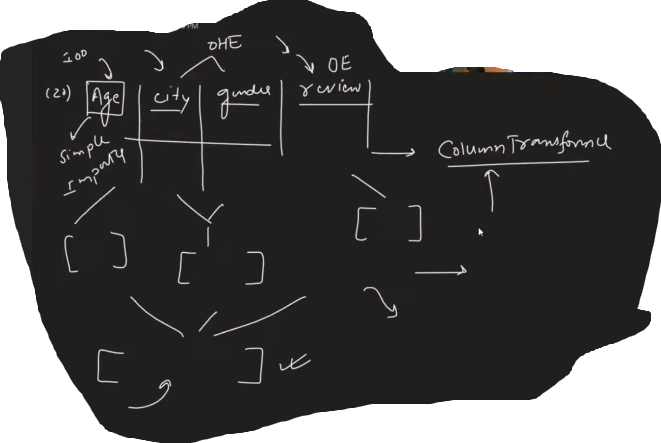

In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('covid_toy.csv')

In [4]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [5]:
df['cough'].value_counts()

cough
Mild      62
Strong    38
Name: count, dtype: int64

In [6]:
df['city'].value_counts()

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

In [7]:
# Gender, city -- Nominal categorical variable -- OHE
# Cough -- Ordinal categorical variable -- OrdinalEncoding
# Fever have missing values
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [9]:
X_train.head()

,age,gender,fever,cough,city
43,22,Female,99.0,Mild,Bangalore
20,12,Male,98.0,Strong,Bangalore
32,34,Female,101.0,Strong,Delhi
5,84,Female,NaN,Mild,Bangalore
88,5,Female,100.0,Mild,Kolkata


## Regurlar Approach

In [10]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(80, 1)

In [11]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [14]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

(80, 4)

In [15]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [17]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

## Column Transfomer approach

In [19]:
from sklearn.compose import ColumnTransformer

In [21]:
transfomer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city']),
],remainder='passthrough')
                              

In [24]:
transfomer.fit_transform(X_train).shape

(80, 7)

In [25]:
transfomer.fit_transform(X_test).shape

(20, 7)